In [1]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
import pickle

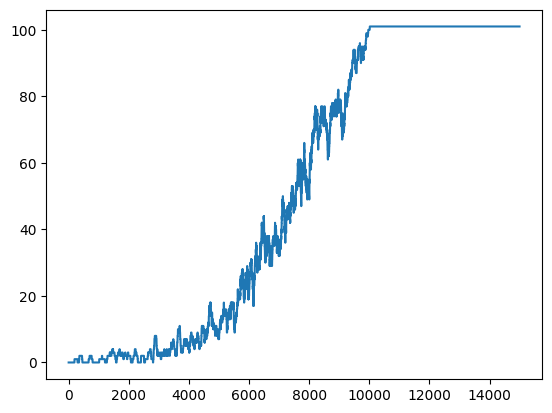

In [2]:
def run(episodes, is_training = True, render = False):
    env = gym.make('FrozenLake-v1', map_name='8x8',is_slippery=False, render_mode='human' if render else None)
    
    if(is_training):
        q = np.zeros([env.observation_space.n, env.action_space.n])
    else:
        f = open("frozenlake8x8.pkl", "rb")
        q = pickle.load(f)
        f.close()

    learning_rate = 0.9 # learning rate
    discount = 0.9 # discount factor
    
    epsilon = 1.0
    epsilon_decay_rate = 0.0001 
    rng = np.random.default_rng()

    rewards_per_episode = np.zeros(episodes)


    for i in range(episodes):
        state = env.reset()[0]
        terminated = False
        truncated = False


        while (not terminated and not truncated):
            if is_training and rng.random() < epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(q[state, :])
            
            new_state, reward, terminated,truncated, _ = env.step(action)

            if is_training:
                q[state, action] = q[state, action] + learning_rate * (reward + discount * np.max(q[new_state, :]) - q[state, action])
            state = new_state

        epsilon = max(epsilon - epsilon_decay_rate,0)

        if epsilon == 0:
            learning_rate = 0.0001
        if reward == 1:
            rewards_per_episode[i] = 1

    env.close()

    sum_rewards = np.zeros(episodes)
    for t in range(episodes):
        sum_rewards[t] = np.sum(rewards_per_episode[max(0, t-100):(t+1)])
    plt.plot(sum_rewards)
    plt.savefig('frozenlake8x8.png')

    if is_training:
        f= open ("frozenlake8x8.pkl","wb")
        pickle.dump(q,f)
        f.close()
if __name__ == '__main__':
    run(15000, is_training=True, render=False)
